# Clustering  
Author: Melvin Vellera

<a id='introduction'></a>

## Introduction

The goal of this report is to provide a high-level overview of clustering and the different algorithms associated with it. A few of the clustering algorithms (K-Means, K-Means++, and Spectral Clustering) have been implemented from scratch in order to gain a clearer understanding. A specific and very important application of clustering, image quantization, has also been discussed. In the end, the performance of a few algorithms (Hierarchical, DBScan, GMM) have been compared using a dataset that has true labels.

## Table of Contents
1. [What is Clustering?](#whatisclustering)
2. [Types of Clustering](#typesofclustering)
3. [K-means](#kmeans)
4. [K-means++](#kmeans++)
5. [Spectral Clustering](#spectralclustering)
6. [Breiman's trick with Random Forests](#breiman)
7. [Image Quantization](#applications)
8. [Algorithm Comparisons](#comparisons)
9. [Conclusion](#conclusion)

<a id='whatisclustering'></a>

## What is Clustering?

Clustering is the task of grouping objects in such a way that objects in one group are more similar to each other than to those from other groups. Humans, as a society, have been “clustering” for a long time in attempts to understand (and simplify) the environment we live in. For example:
- Clustering the animal and plant kingdoms into a hierarchy
- Clustering chemical structures.
- Clustering grocery items into similar groups

Clustering is a highly popular **unsupervised** machine learning technique i.e. it does not require any labeled training data. It is often often employed in industry to find "hidden" groupings in data, like segmenting customers into different groups, where the customers in a group have similar characteristics. It is also often used in data visualizations, anomaly detection (fraud or network attacks), and recommendation engines.

Ideally, the clustered groups have two properties:
1. Points within a given cluster are similar (high intra-cluster similarity)
2. Points in different clusters are not similar (low inter-cluster similarity)

Some clustering algorithms require you to specify or guess at the number of clusters to discover in the data, whereas others require the specification of some minimum distance between observations in which examples may be considered “close” or “connected”. As such, cluster analysis is an iterative process where subjective evaluation of the identified clusters is fed back into changes to algorithm configuration until a desired or appropriate result is achieved.

<a id='typesofclustering'></a>

## Types of Clustering

There are many clustering algorithms to choose from and no single best clustering algorithm for all cases. Instead, it is a good idea to explore a range of clustering algorithms and different configurations for each algorithm.

Clustering techniques fall mostly under the following types:
1. **Connectivity based** (Hierarchical clustering)
    - Clustering could be agglomerative (bottom-up) or divisive (top-down)
    - Generally visualized using a dendogram (tree-type structure)
    - Hierarchical clustering is useful when there is not a specific number of clusters and a more interpretable and informative output is required such as taxonomies
2. **Centroid based** (K-means)
    -  Arbitrarily selects centroids for k distinct clusters and assigns data points to these clusters. The centroids are recomputed and the data points are reassigned iteratively until the centroids do not change
    - Centroid-based algorithms are efficient but sensitive to initial conditions and outliers
3. **Distribution based clustering** (Gaussian Mixture Model)
    - Assumes that the data being analyzed come from a mixture of k Gaussian distributions, each having a different mean and variance
    - Compared to k-means, GMMs are more flexible because k-means only takes into account the mean of a cluster, while GMMs take into account the mean and variance. 
4. **Density based clustering** (DBScan)
    - Density clustering does not require a number of clusters as a parameter. Instead, it infers that number and learns to identify clusters of arbitrary shapes
    - Generally, density clustering is more helpful for outlier detection than k-means

There is also another specialized type of clustering technique known such as **spectral clustering** which will be covered later in the notebook.

Additionally, clustering can also be distinguished as follows:
1. **Hard Clustering**: Each object belongs to a cluster or not
2. **Soft Clustering**: Each object belongs to each cluster to a certain degree (for example, a likelihood of belonging to the cluster). This is also sometimes called as fuzzy clustering.

<div style="page-break-after: always; visibility: hidden"> </div>
<a id='kmeans'></a>

## K-means

K-means is one of the most used clustering algorithms since it is easy to interpret and implement. K-means has the advantage that it’s pretty fast, as the algorithm is only computing the distances between points and group centers. It, thus, has a linear complexity O(n). The algorithm is as follows:  

1. Select $k$ unique points from $X$ as the initial centroids for $k$ clusters
2. Find closest cluster centroid using Euclidean distance for each $x \in X$ and add $x$ to that cluster
3. Recompute cluster centroids i.e the mean of all points in a cluster
4. Repeat steps 2 and 3 until clusters do not change

**Note:** The number of clusters to be estimated ($k$) is set by the user and can be optimized if necessary. The optimization is usually done using the elbow method.

Let's try k-means on a toy dataset of student grades:

In [1]:
from kmeans import *
grades = [92.65, 93.87, 74.06, 86.94, 92.26, 94.46, 92.94, 80.65, 92.86, 
          85.94, 91.79, 95.23, 85.37, 87.85, 87.71, 93.03]
k = 3          
grades = np.array(grades).reshape(-1, 1)
centroids, labels = kmeans(grades, k, seed=1)
for i in range(k):
    print(f"Cluster {i}: {grades[labels==i].reshape(-1)}")

Cluster 0: [86.94 85.94 85.37 87.85 87.71]
Cluster 1: [92.65 93.87 92.26 94.46 92.94 92.86 91.79 95.23 93.03]
Cluster 2: [74.06 80.65]


As seen from the above output, the k-means algorithm does a decent job at clustering the grades into 3 groups, where the groups are dissimilar from each other and the grades in the group are similar to each other.

<br>

**How do we know that k=3 is the "right" number of clusters for this dataset?**  
Well, we cannot know for sure. We can try certain methods such as the elbow method to get a good estimate for k.
    

#### Elbow Method:  
The elbow method uses an elbow plot which plots for different values of k the "Within Cluster Sum of Squares" or "Inertia", which is the sum of the squared distances of each point to its closest centroid.

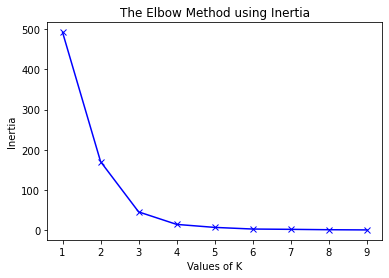

In [2]:
get_elbow_plot(grades)

From the above elbow plot, we determine the "elbow", which is the value of k from which the inertia stops decreasing drastically. We can see that it is around 3 or 4 clusters from the above elbow plot. 

<a id='kmeans++'></a>

## K-Means++

The k-means algorithm has a few shortcomings:
1. You have to select or guess the number of clusters. This isn’t always trivial and ideally with a clustering algorithm we’d want it to figure those out for us because the point of it is to gain some insight from the data.
2. K-means also starts with a random choice of cluster centers and therefore the **quality of clustering is highly sensitive to the initialization of cluster centers**

The k-means++ algorithm addresses the second of these obstacles by specifying a procedure to initialize the cluster centers before proceeding with the standard k-means optimization iterations. With the k-means++ initialization, the algorithm is guaranteed to find a solution that is O(log k) competitive to the optimal k-means solution.

The algorithm is as follows:
1. Pick first point randomly
2. Pick next k-1 points by selecting points that maximize the minimum distance to all existing clusters. So for each point, compute distance to each cluster and find that minimum.  Among the min distances to a cluster for each point, find the max distance. The associated point is the new centroid.

**Let's compare the intitial centroid locations of K-means and K-means++ for 5 iterations:**

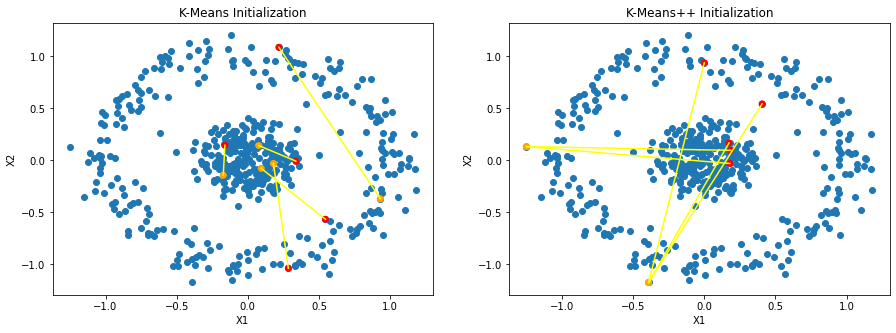

In [3]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
k_centroids, kpp_centroids = get_init_centroids(X, k=2, max_iter=5)
plot_centroids(X, k_centroids, kpp_centroids)

As you can see from the above 2 plots, K-Means++ tries to initialize the centroids as far away from each other as possible. This generally leads to better clustering results.

**To actually see if there is an improvement in clustering due to K-means++ initialization**, we can get try running both algorithm variants multiple times on a dataset with known labels and compare the results.

Let's choose the breast cancer dataset as an example: 

In [4]:
X, y = read_breast_cancer()

Here, X represents features of the breast cancer dataset and y represent whether a woman had breast cancer (1) or not (0). Using K-Means, we can cluster the X feature vectors into 2 groups. From these 2 groups, we can deduce the accuracy of clustering by comparing with the true labels (y).

<a id='kmeans_breast_cancer'></a>
Let's get the accuracies for K-Means and K-Means++:

In [5]:
k_accuracies, kpp_accuracies = get_accuracies(X, y, k=2, max_iter=10)
print(f'Mean Clustering Accuracy\nK-Means: {np.mean(k_accuracies):.4f}')
print(f'K-Means++: {np.mean(kpp_accuracies):.4f}')

Mean Clustering Accuracy
K-Means: 0.9083
K-Means++: 0.9116


As you can see from the above results, K-Means++ performs slightly better than K-Means for the breast cancer dataset over multiple iterations (10). 

The confusion matrix is given below:

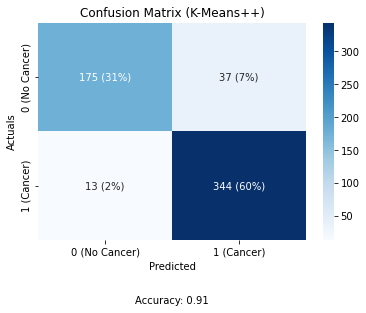

In [6]:
centroids, labels = kmeans(X, k=2, centroids='kmeans++', tolerance=.01)
labels = label_modification(y, labels)
plot_confusion_matrix(y, labels, "0 (No Cancer)", "1 (Cancer)", "Confusion Matrix (K-Means++)")

#### Wait a minute..

<br>

**How do we know which cluster (0 or 1) represent the cancer and non-cancer groups?**  

Well.. We don't!

As mentioned previously, we had to "deduce" the accuracy of the clusters by making an assumption that if a cluster has mostly zeros as its true labels, then it is the non-cancer group, while if the cluster has mostly ones as its true labels, then it is the cancer group. 

Here is the code for reversing cluster labels if cluster 1 does not represent the cancer group (1):
```python
def label_modification(y, labels):
    # Get value counts of 0s and 1s for cluster 1
    vals, counts = np.unique(y[labels == 1], return_counts=True)
    
    # Find out which number is more prevalent in cluster 1: 0 or 1
    mode = vals[np.argmax(counts)]
    
    # If 0 is more prevalent in cluster 1, then reverse the labels
    if mode != 1: 
        labels = np.where(labels == 1, 0, 1)
    return labels
```

<br>

#### Limitation of K-means++:

K-means++ can only separate clusters that are more or less linearly separable. **If the clusters are based on distance to the origin**, K-means++ will not be able to identify them.
  
Let's take the following example of concentric circles to demonstrate this limitation.

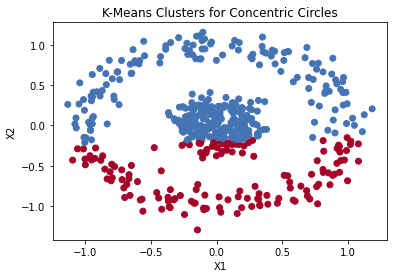

In [7]:
X, _ = make_circles(n_samples=500, noise=0.1, factor=.2, random_state=1)
centroids, labels = kmeans(X, 2, centroids='kmeans++')
plot_scatter(X, labels, 'X1', 'X2', 'K-Means Clusters for Concentric Circles')

As can been seen from the above plot, K-means cannot identify the right clusters. So what are the options at this point?

1. Convert the cartesian coordinates to polar coordinates
2. Use other clustering techniques such as spectral clustering

#### Cartesian to Polar Coordinates:

A transformation from cartesian to polar coordinates changes the data into something that k-means can cluster well. The transformed data looks like this:

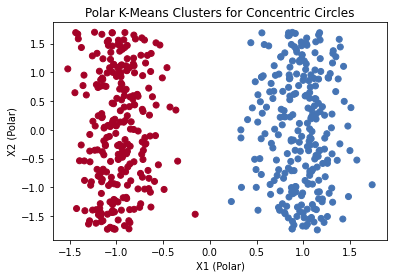

In [8]:
Xpol = cart2pol(X)
centroids, labels = kmeans(Xpol, 2, centroids='kmeans++', seed=1)
plot_scatter(Xpol, labels, 'X1 (Polar)', 'X2 (Polar)', 'Polar K-Means Clusters for Concentric Circles')

By visualizing using our original dataset, we can see that the clustering is done right.

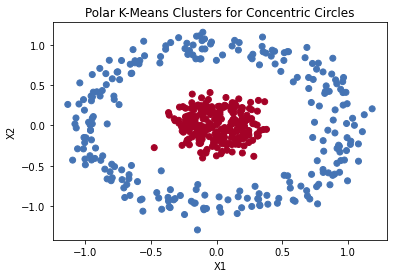

In [9]:
plot_scatter(X, labels, 'X1', 'X2', 'Polar K-Means Clusters for Concentric Circles')

However, this intuition of changing from cartesian to polar coordinates is not always apparent and one would ideally want an algorithm that can take care of such cases automatically. Spectral clustering is one such algorithm that is equipped to deal with such cases.

<a id='spectralclustering'></a>

## Spectral Clustering

Spectral clustering is a technique that has its roots in graph theory and is used to identify clusters of nodes in a graph based on the edges connecting them. The method can be used to cluster non graph data as well.

In practice, spectral clustering is very useful when the a measure of the center and spread of the cluster is not a suitable description of the complete cluster, such as when clusters are nested circles on the 2D plane.

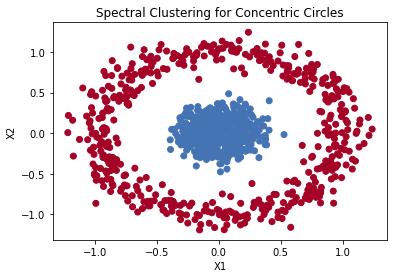

In [10]:
X, _ = make_circles(n_samples=1000, noise=0.1, factor=.2, random_state=1)
cluster = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
labels = cluster.fit_predict(X) 
plot_scatter(X, labels, 'X1', 'X2', 'Spectral Clustering for Concentric Circles')

<div style="page-break-after: always; visibility: hidden"> </div>

#### A Deeper Dive:
We can understand Spectral Clustering even deeper by trying to implement the algorithm. Spectral clustering makes use of the spectrum (eigenvalues) of the similarity matrix of the data to perform dimensionality reduction before clustering in fewer dimensions.  

The algorithm for Spectral Clustering is as follows: 

```python
def customSpectralClustering(X, k):
    # Calculate similarity matrix using nearest-neighbors (We can use other methods as well)
    A = kneighbors_graph(X, n_neighbors=10).toarray()

    # Calculate the Laplacian from the similarity matrix
    D = np.diag(A.sum(axis=1))
    L = D-A    

    # Calculate the eigenvectors and eigenvalues from the Laplacian
    vals, vecs = np.linalg.eig(L)
    vecs = vecs[:,np.argsort(vals)]
    vals = vals[np.argsort(vals)]

    # K-means on first k-1 vectors with nonzero eigenvalues (k = Number of clusters)
    selected_vecs = vecs[:, ~np.isclose(vals, 0)][:, 0:1]
    centroids, labels = kmeans(vecs[:, 1:2], 2, centroids='kmeans++')
    return labels
```

**Note:** 
The Laplacian can be of different forms: Simple, Normalized, Generalized, Relaxed. The one used in the above algorithm is the Simple Laplacian. They all share the Degree matrix D. The Degree matrix is a diagonal matrix that measures the degree at each node. 

Let's see how the clustering looks like using our custom spectral clustering algorithm:

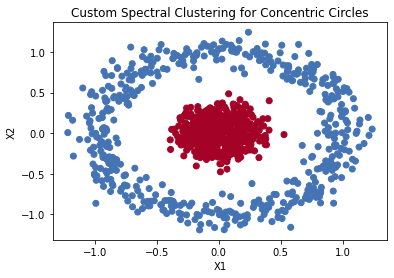

In [11]:
labels = customSpectralClustering(X, k=2)
plot_scatter(X, labels, 'X1', 'X2', 'Custom Spectral Clustering for Concentric Circles')

<div style="page-break-after: always; visibility: hidden"> </div>

#### Eigengap Heuristic 
As with k-means, the number of clusters need to be known in advance for spectral clustering. This is usually given by the value of k that maximizes the eigengap (difference between consecutive eigenvalues). i.e., choose the number k such that all eigenvalues $\lambda_1,\dots,\lambda_k$ are very small, but $\lambda_k+1$ is relatively large. The larger this eigengap is, the closer the eigenvectors of the ideal case and hence the better spectral clustering works. 

#### What if the data has categorical features?  
**The nearest neighbors approach to spectral clustering is inappropriate when there is categorical data or when the number of dimensions get very high.** The next algorithm is able to address these issues.

<a id='breiman'></a>

## Breiman's trick with Random Forests

To overcome the limitations of the nearest neigbors approach, we can compute the similarity matrix using a Random Forest. The algorithm for creating a similarity matrix using Random Forests is as follows:

```python
def breiman_similarity_matrix(X):
    # Consider all X records as class 0
    # Duplicate and bootstrap columns of X to get X' (class 1)
    n = len(X)
    X_ = bootstrap_columns(X)

    # Create y to distinguish X vs X'
    stacked_y = np.array([0]*n + [1]*n)
    stacked_X = np.vstack((X, X_))

    # Train RF on stacked [X, X'] -> y
    rf = RandomForestClassifier(random_state=0)
    rf.fit(stacked_X, stacked_y)

    # Walk all leaves of all trees, bumping similarity[i, j] for all x(i), x(j) pairs in leaf
    leaves = leaf_samples(rf, X)
    similarity_matrix = walk_leaves_and_compute_similarity(leaves, n)

    # Divide similarities by num of leaves            
    similarity_matrix /= len(leaves)
    return similarity_matrix
```

Let's try using this technique on the breast cancer dataset and see its accuracy.

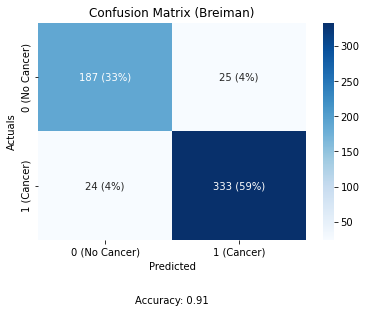

In [12]:
X, y = read_breast_cancer()
similarity_matrix = breiman_similarity_matrix(X)
cluster = SpectralClustering(n_clusters=2, affinity='precomputed')
labels = cluster.fit_predict(similarity_matrix)
labels = label_modification(y, labels)
plot_confusion_matrix(y, labels, "0 (No Cancer)", "1 (Cancer)", "Confusion Matrix (Breiman)")

<a id='applications'></a>

## Image Quantization

Although clustering is used for a plethora of reasons in the data science industry, its most useful applications are in color quantization and image compression.

Each pixel in a color image has a size of 3 bytes (24 bits) with 1 byte each for Red, Green, and Blue colors. This can make images really big. If a picture has only 256 unique colors, then we can map all the colors to a single byte instead of 3 bytes. Thus, we can achieve 3x compression for each pixel which is a massive amount of compression.

Let's try using some sample images to test image quantization and compression using k-means:

In [13]:
k = 12
img, X, h, w = read_image('images/cat.jpeg', grayscale=True)
centroids, labels = kmeans(X, k=k, centroids='kmeans++')
centroids = centroids.astype(np.uint8)
X_ = centroids[labels]
img_ = Image.fromarray(X_.reshape(h,w), 'L')
original_size, compressed_size = get_sizes(img, img_)

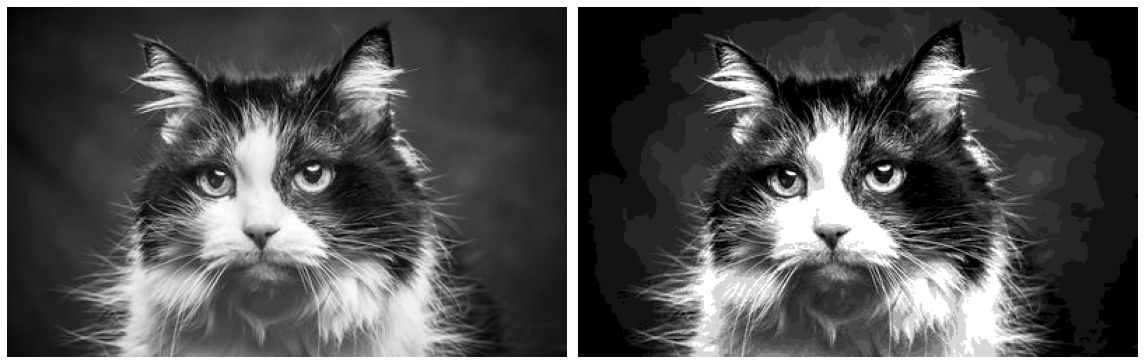

In [14]:
show_images(img, img_)

Using just 12 integer-valued colors, we were able to get a good approximation of the original image. Now, let us see by how much the size of the original image reduced:

In [15]:
print(f'Size of original image: {original_size}')
print(f'Size of compressed image: {compressed_size}')

Size of original image:  52 KB
Size of compressed image:  27 KB


**As we can see, the size reduced by almost half, achieving a 2x compression!**

Now let's see the results on a color image:

In [16]:
k=32
img, X, h, w = read_image('images/dog.jpeg', grayscale=False)
centroids, labels = kmeans(X, k=k, centroids='kmeans++', max_iter=30)
centroids = centroids.astype(np.uint8)
X_ = centroids[labels]
img_ = Image.fromarray(X_.reshape((h,w,3)))
original_size, compressed_size = get_sizes(img, img_, grayscale=False)

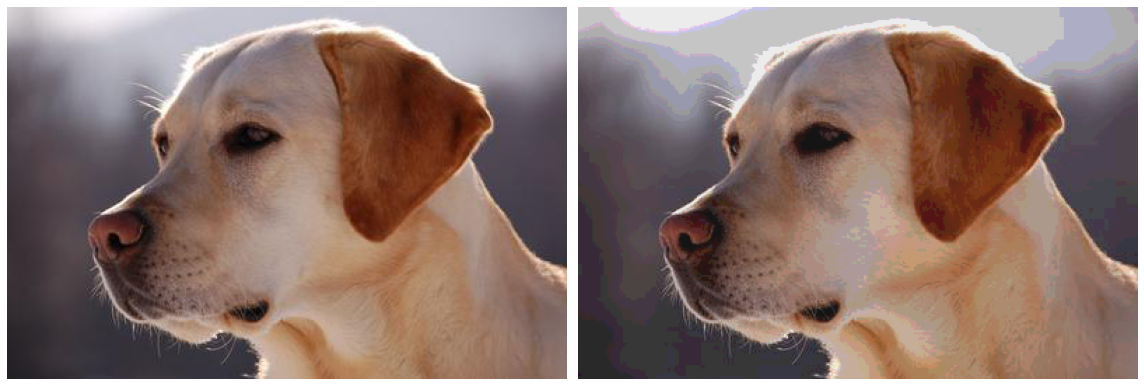

In [17]:
show_images(img, img_)

In [18]:
print(f'Size of original image: {original_size}')
print(f'Size of compressed image: {compressed_size}')

Size of original image: 112 KB
Size of compressed image:  83 KB


In this case, we were able to get a good approximation with 32 integer-valued colors. The size of the original image reduced considerably as well.

<a id='comparisons'></a>

## Algorithm Comparisons

In this section, we will compare the performance of some other well-known clustering algorithms such as DBScan, Gaussian Mixture, and Hierarching (Agglomerative) clustering on the breast cancer dataset. As a point of [reference](#kmeans_breast_cancer), we know that the K-means++ algorithm achieved an accuracy of around 0.91 on this dataset. 

In [19]:
X, y = read_breast_cancer()

#### Hierarchical Clustering (Agglomerative)

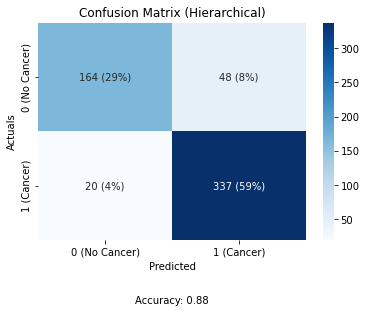

In [20]:
hier = AgglomerativeClustering(n_clusters=2, linkage="ward")
labels = get_labels(X, y, hier)
plot_confusion_matrix(y, labels, "0 (No Cancer)", "1 (Cancer)", "Confusion Matrix (Hierarchical)")

Agglomerative clustering (linkage=ward) gives a decent performance of 0.88 on this dataset. The other linkages (single, average, complete) did not give good results.

#### Gaussian Mixture Model (GMM)

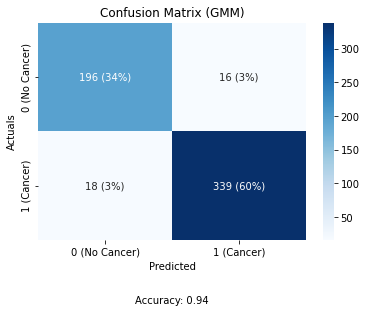

In [21]:
gmm = GaussianMixture(n_components=2)
labels = get_labels(X, y, gmm)
plot_confusion_matrix(y, labels, "0 (No Cancer)", "1 (Cancer)", "Confusion Matrix (GMM)")

Gaussian Mixture Model outperformed our K-means++ baseline of 0.91 with an accuracy of 0.94! GMM is known to be more flexible than K-means since it also takes the variances of the clusters into consideration.

#### DBScan

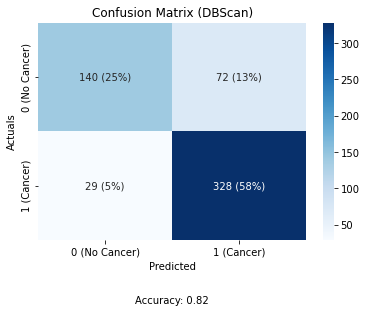

In [22]:
dbscan = DBSCAN(eps=4.1, min_samples=150)
labels = get_labels(X, y, dbscan)
plot_confusion_matrix(y, labels, "0 (No Cancer)", "1 (Cancer)", "Confusion Matrix (DBScan)")

DBScan turned out to be the hardest algorithm to tune since it automatically tries to detect clusters based on two other hyperparameters: eps and min_samples. The algorithm also groups all the points it cannot classify into a single "unknown" cluster which it labels as -1. This might be more helpful in the cases where outliers need to be detected. Nevertheless, the maximum accuracy that could be achieved with extensive hyperparameter tuning turned out to be 0.82, which is not an improvement over the other three algorithms.

Hence, the GMM algorithm, with an accuracy of 0.94, did best on the breast cancer dataset.

<a id='conclusion'></a>
## Conclusion:  
To conclude, clustering is a fundamentally important task that can be utilized for a wide variety of applications: image quantization & compression, outlier detection, customer segmentation and others. There are numerous techniques available for clustering, each having its pros and cons, and no single technique can be used in all contexts. In the report, we saw that spectral clustering can excel in a scenario where k-means fails. We also saw that GMM outperformed other algorithms for the breast cancer dataset. 

The report also included explanations and implementations of multiple algorithms from scratch (K-means, K-means++, Spectral Clustering, and Breiman's Similarity Matrix using Random Forests), which are crucial in order to gain a deeper understanding of different clustering techniques. An important application, image quantization & compression, was carried out using sample images (grayscale and color), and the resulting compressed images and image sizes were shown.